# 02806 Final Project

_Yue Zhou_  - s232893

_Jia Wei_  - s233486

Group 15

Our website : https://to1and.github.io/

## Motivation

### What is your dataset?
Our main dataset is called MovieLens Dataset (consists of movies released on or before July 2017). It's 33 MB, including 45572 rows (That is to say, it includes data for a total of 45,572 movies), 24 variables. We also introduce several other related dataset like rating, keywords and credits for reference. The total size of all data is approximately 900 MB.


### Why did you choose this/these particular dataset(s)?
Analyzing this dataset is a strategic choice for understanding the intricate relationship between movie elements and financial performance. It offers a comprehensive view of various factors that influence a movie's financial outcomes, such as genres, budgets, revenues, and ratings.

Firstly, the dataset contains a wealth of information, including genres, budgets, and revenue figures, providing insights into the economic dynamics of the film industry. By examining these elements, we can uncover patterns like which genres are more profitable, the relationship between production budgets and box office success, and how ratings influence audience preferences.

Moreover, the inclusion of production companies, countries, and release dates enables us to analyze trends over time and understand the evolving landscape of the movie industry. This temporal analysis helps identify shifts like the impact of streaming platforms and changing audience tastes, offering valuable insights for forecasting future trends.

In summary, this dataset provides a rich foundation for data-driven decision-making. By exploring the relationships between different movie elements and financial performance, stakeholders can make informed choices on budgeting, genre focus, and marketing strategies to navigate the ever-changing film industry landscape effectively.

## Basic stats

### Write about your choices in data cleaning and preprocessing
First, we should take a look at our dataset and find out what are we interested in, what is worth analyzing, and what do we not need.

In [5]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
import warnings
from wordcloud import STOPWORDS
from collections import defaultdict
import re
import ast
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

word_weights = defaultdict(float)
enhanced_stopwords = STOPWORDS.copy()
enhanced_stopwords.update([str(i) for i in range(10)])
enhanced_stopwords.update([chr(i) for i in range(65, 91)]) 
enhanced_stopwords.update([chr(i) for i in range(97, 123)]) 

In [6]:
df = pd.read_csv('movies.csv')
df_original = pd.read_csv('movies.csv')
movie_data = pd.read_csv('cleaned_movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

We can see that our main dataset contains 24 columns, which are listed below:

1. **adult** (`object`): Indicates whether the movie is intended for adults (e.g., `False`).
2. **belongs_to_collection** (`object`): Contains information about the movie's collection if it belongs to one, in JSON-like format (e.g., `{'id': 10194, 'name': 'Toy Story Collection'}`).
3. **budget** (`object`): The production budget of the movie, stored as a string due to mixed data types (e.g., `30000000`).
4. **genres** (`object`): List of genres for the movie in JSON-like format (e.g., `"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]"`).
5. **homepage** (`object`): The movie's official website (e.g., `http://toystory.disney.com/toy-story`).
6. **id** (`object`): Unique identifier for the movie (e.g., `862`).
7. **imdb_id** (`object`): The movie's IMDb identifier (e.g., `tt0114709`).
8. **original_language** (`object`): ISO 639-1 code for the original language of the movie (e.g., `en` for English).
9. **original_title** (`object`): The original title of the movie (e.g., `Toy Story`).
10. **overview** (`object`): A brief synopsis or summary of the movie (e.g., `Led by Woody, Andy's toys live happily...`).
11. **popularity** (`object`): Popularity score as a string due to mixed data types (e.g., `21.946943`).
12. **poster_path** (`object`): Path to the movie's poster image (e.g., `/rhIRbceoE9lR4veEXuwCC2wARtG.jpg`).
13. **production_companies** (`object`): List of production companies in JSON-like format (e.g., `"[{'name': 'Pixar Animation Studios', 'id': 3}]"`).
14. **production_countries** (`object`): List of production countries in JSON-like format (e.g., `"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"`).
15. **release_date** (`object`): Release date of the movie (e.g., `1995-10-30`).
16. **revenue** (`float64`): Box office revenue generated by the movie (e.g., `373554033.0`).
17. **runtime** (`float64`): Duration of the movie in minutes (e.g., `81.0`).
18. **spoken_languages** (`object`): List of spoken languages in JSON-like format (e.g., `"[{'iso_639_1': 'en', 'name': 'English'}]"`).
19. **status** (`object`): Current status of the movie (e.g., `Released`).
20. **tagline** (`object`): A tagline or catchphrase for the movie (e.g., `Just When His World Is Back To Normal...`).
21. **title** (`object`): The title of the movie (e.g., `Toy Story`).
22. **video** (`object`): Indicates if there is a related video (e.g., `False`).
23. **vote_average** (`float64`): Average user rating for the movie (e.g., `7.7`).
24. **vote_count** (`float64`): Number of votes the movie received (e.g., `5415.0`).

It's obvious that some of them are pretty useless to us and let us start by removing these features. There are a lot of things we don't care about in our dataset, such as whether or not it's adult content (and the fact that very few films are labelled as such).

In [7]:
df = df.drop('original_title', axis=1)
df = df.drop('adult', axis=1)
df = df.drop(['imdb_id'], axis=1)
df = df.drop(['poster_path'], axis=1) 
df = df.drop(['homepage'], axis=1)
df = df.drop(['id'], axis=1)

We then need to consider a number of issues, for the main objective we are looking at, we need to filter out non-zero values to ensure that the data makes sense.

In [8]:
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


df = df.dropna(subset=['revenue', 'budget'])



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45460 entries, 0 to 45465
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4490 non-null   object        
 1   budget                 45460 non-null  float64       
 2   genres                 45460 non-null  object        
 3   original_language      45449 non-null  object        
 4   overview               44506 non-null  object        
 5   popularity             45460 non-null  object        
 6   production_companies   45460 non-null  object        
 7   production_countries   45460 non-null  object        
 8   release_date           45376 non-null  datetime64[ns]
 9   revenue                45460 non-null  float64       
 10  runtime                45203 non-null  float64       
 11  spoken_languages       45460 non-null  object        
 12  status                 45379 non-null  object        
 13  taglin

As we can see, we have over 5,000 rows of data with non-null or zero revenue and budget. This may not seem like a large sample size, about 10% of our entire dataset, but it's enough for us to do some analysis.

Next, we are going to consider adding a new quantity for the ratio of box office to cost. This coefficient we use to measure the success of a film in terms of commercial returns. We call it return_rate.

In [10]:
df['return_rate'] = df['revenue'] / df['budget']
df[df['return_rate'].isnull()].shape
df = df[(df['budget'] > 10000) & (df['revenue'] > 10000) & (df['return_rate'] <= 50)]

## Data Analysis & Visualizations

### A glance at title and overview

Do certain words appear more frequently in movie titles and descriptions? It seems likely that some words are deemed more impactful and suitable for a title. Let's investigate this further!

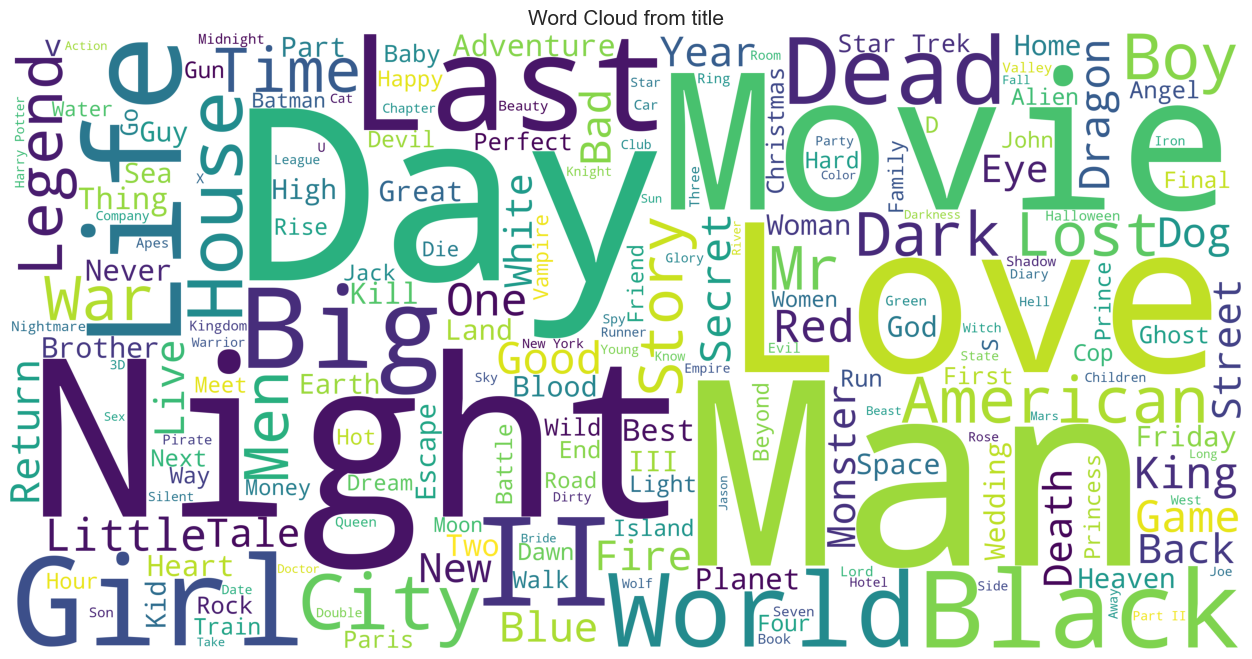

In [11]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.title(f'Word Cloud from {'title'}')
plt.axis('off')
plt.show()


The word **Man** and **Day** tops the list of most frequently used words in movie titles, followed by **Night**, **Love**, and **MOvie**. This trend underscores the pervasive theme of daily life in movies.

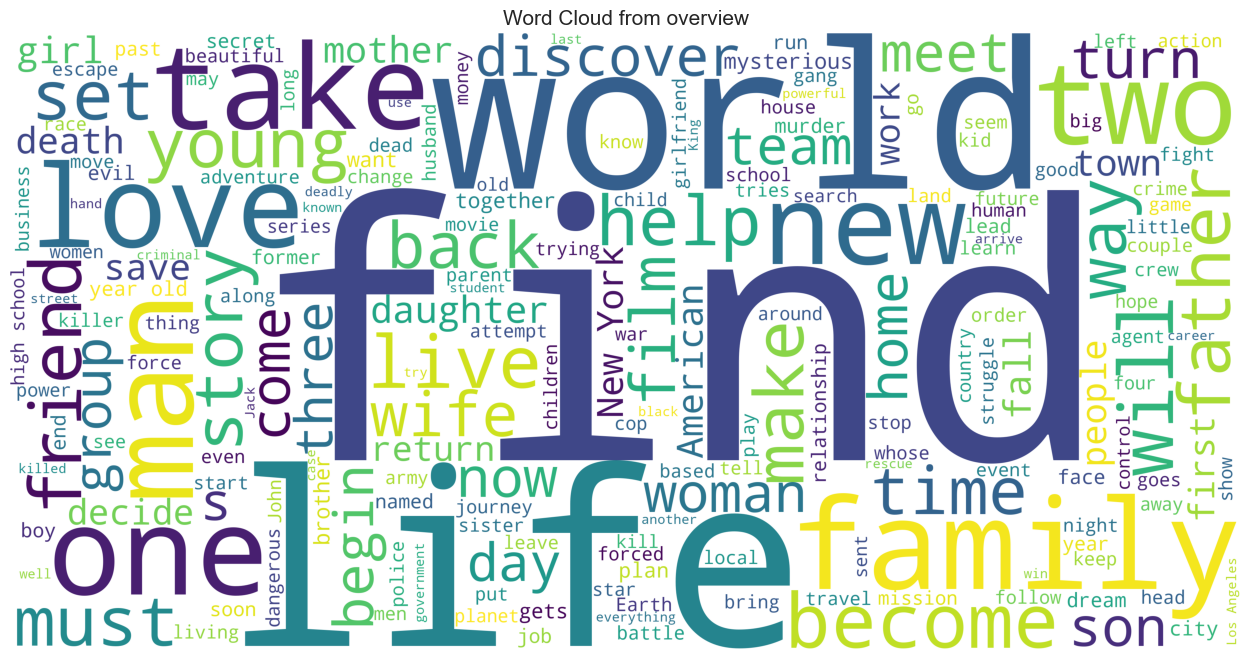

In [12]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.title(f'Word Cloud from {'overview'}')
plt.axis('off')
plt.show()

We can see **Life** and **Find** are popular in Movie Blurbs. Together with **World**, **Family** and **Love**, these wordclouds give us a pretty good idea of the most popular themes present in movies. 

#### What kind of title could be more profitable?

Above is just a summary of the overall data. Now we're moving on to a more interesting part. To intuitively reflect the possible relationship between movie financial performance and titles, we will weight each word in the movie title by its cost and create a new chart like this.

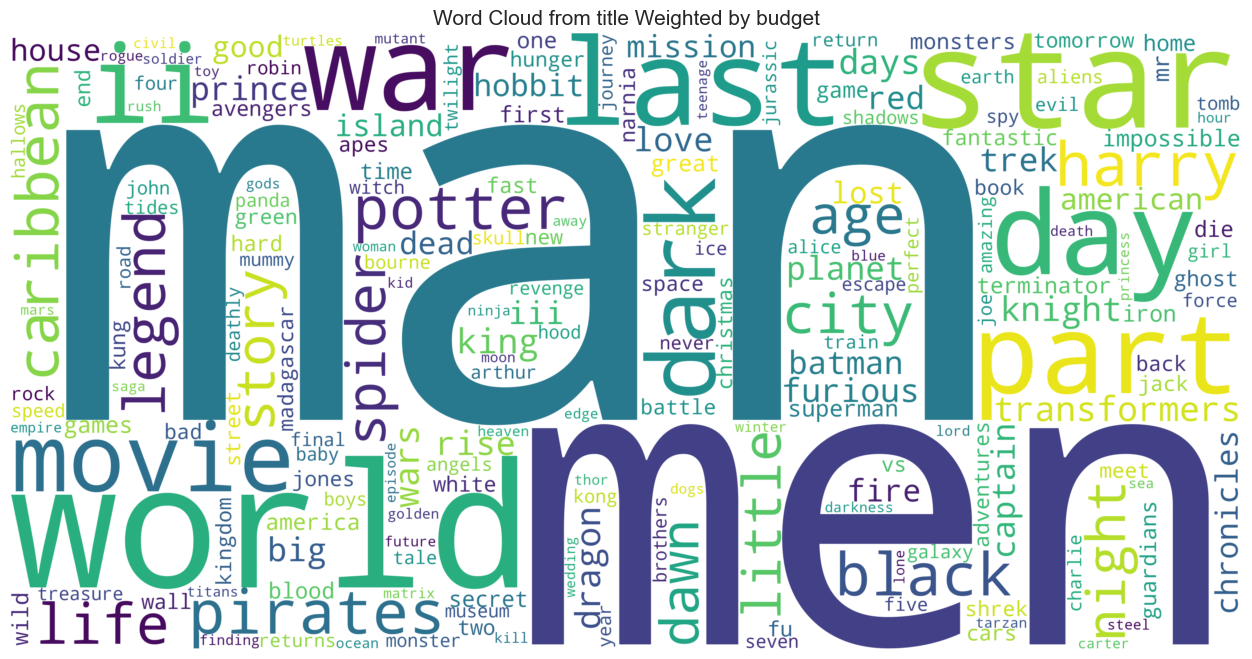

In [13]:
for _, row in df.iterrows():
    words = re.findall(r'\w+', row['title'].lower())
        
    for word in words:
        if word not in enhanced_stopwords and len(word) > 1: 
            word_weights[word] += row['budget']

wordcloud = WordCloud(stopwords=enhanced_stopwords, background_color='white', height=2000, width=4000).generate_from_frequencies(word_weights)
    
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud from {'title'} Weighted by {'budget'}')
plt.show()

Text(0.5, 1.0, 'Word Cloud from title Weighted by revenue')

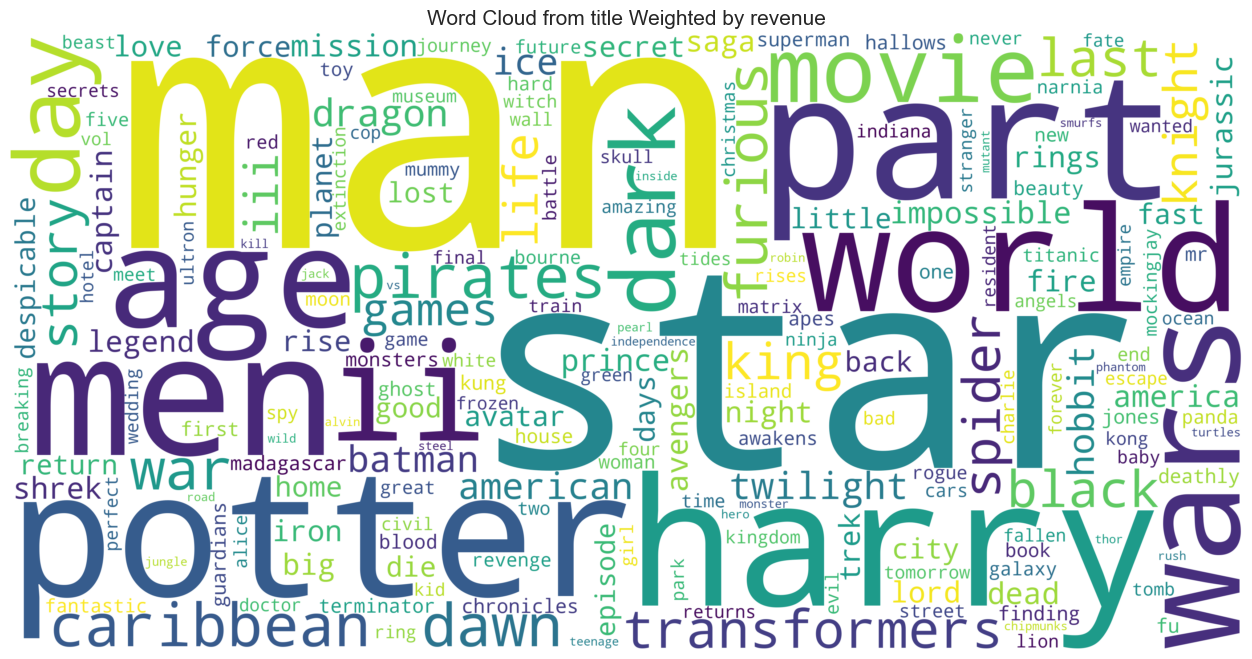

In [14]:
for _, row in df.iterrows():
    words = re.findall(r'\w+', row['title'].lower())
        
    for word in words:
        if word not in enhanced_stopwords and len(word) > 1: 
            word_weights[word] += row['revenue']

wordcloud = WordCloud(stopwords=enhanced_stopwords, background_color='white', height=2000, width=4000).generate_from_frequencies(word_weights)
    
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud from {'title'} Weighted by {'revenue'}')

Text(0.5, 1.0, 'Word Cloud from title Weighted by return_rate')

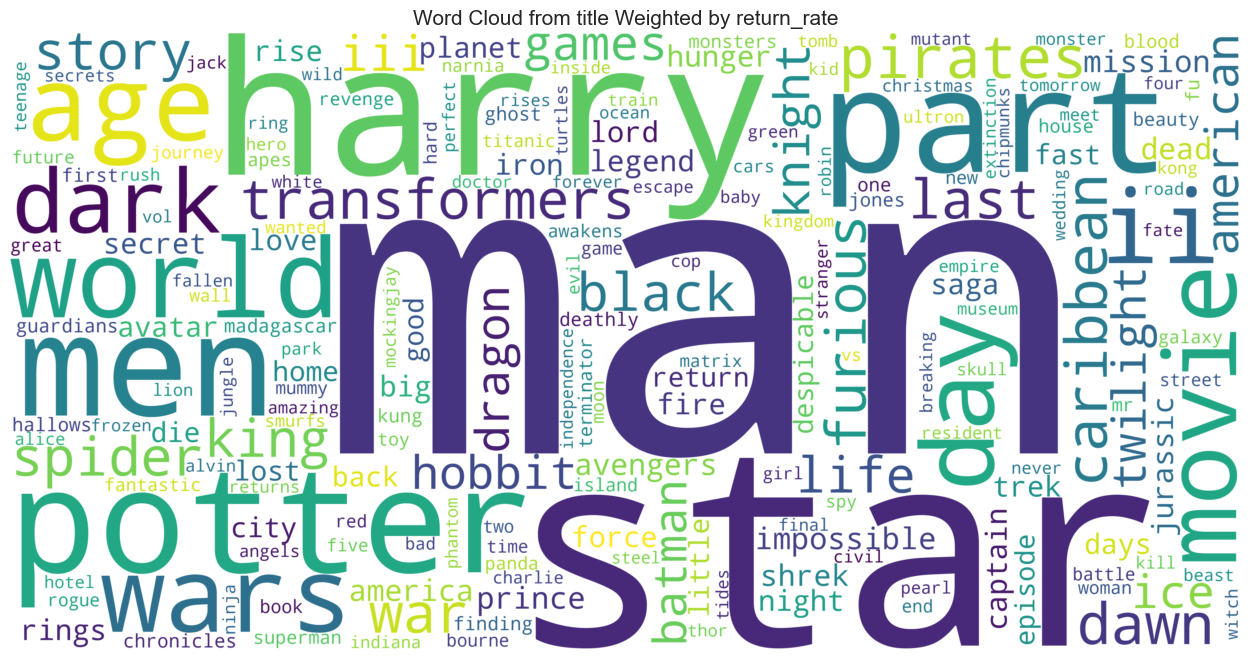

In [15]:
for _, row in df.iterrows():
    words = re.findall(r'\w+', row['title'].lower())
        
    for word in words:
        if word not in enhanced_stopwords and len(word) > 1: 
            word_weights[word] += row['return_rate']

wordcloud = WordCloud(stopwords=enhanced_stopwords, background_color='white', height=2000, width=4000).generate_from_frequencies(word_weights)
    
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud from {'title'} Weighted by {'return_rate'}')

Surprisingly, possibly contrary to the real world, **man** and **men** spent more money if they appear in a movie title. 

And accordingly **man** also makes a lot of money along with the word **star**. I think this makes sense, given that Star Wars is an extremely successful series with many installments. 

As for the return rate, aside from **man** and **star**, it's hard not to notice the words **Harry** and **Potter**, as very few other movies would include these two words. This further confirms the immense commercial success of Harry Potter, which could be one of the most successful movie series in history. Is that the case? Please be patient, we'll reveal more to you later..

Then we are about to talk about the overview of movie. What kind of plot or theme is more appealing? What kind of theme might lead to a movie's failure? Let's explore that now.

Text(0.5, 1.0, 'Word Cloud from overview Weighted by budget')

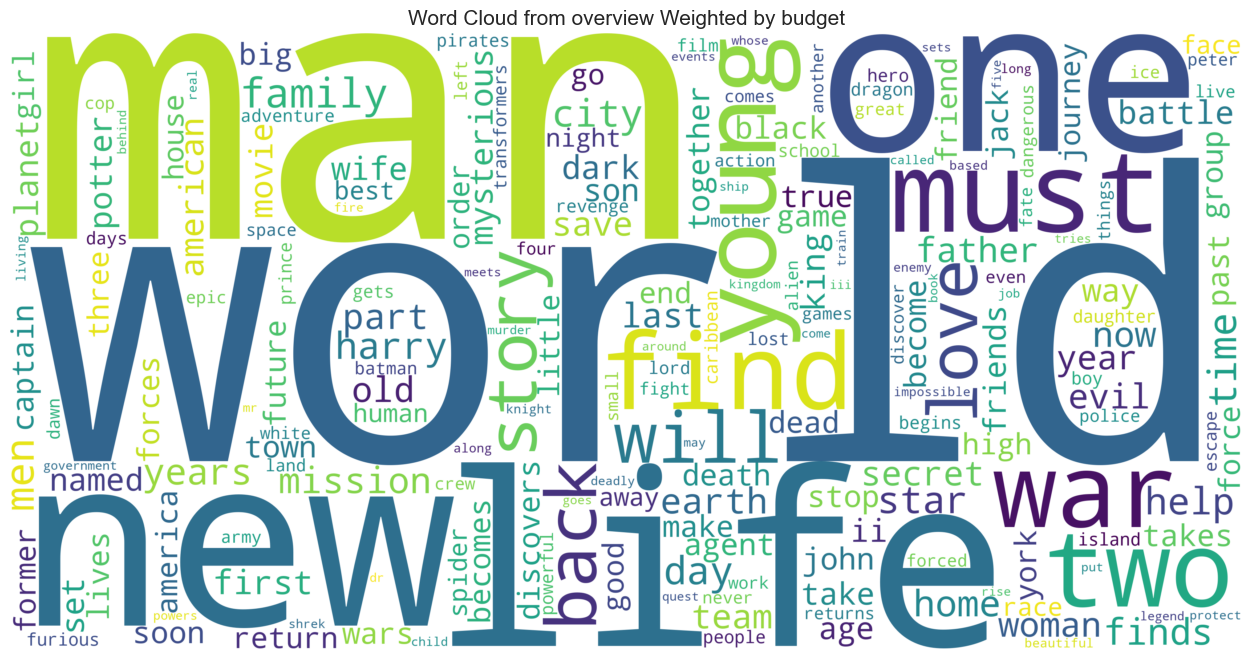

In [16]:
for _, row in df.iterrows():
    words = re.findall(r'\w+', row['overview'].lower())
        
    for word in words:
        if word not in enhanced_stopwords and len(word) > 1: 
            word_weights[word] += row['budget']

wordcloud = WordCloud(stopwords=enhanced_stopwords, background_color='white', height=2000, width=4000).generate_from_frequencies(word_weights)
    
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud from {'overview'} Weighted by {'budget'}')

Text(0.5, 1.0, 'Word Cloud from overview Weighted by revenue')

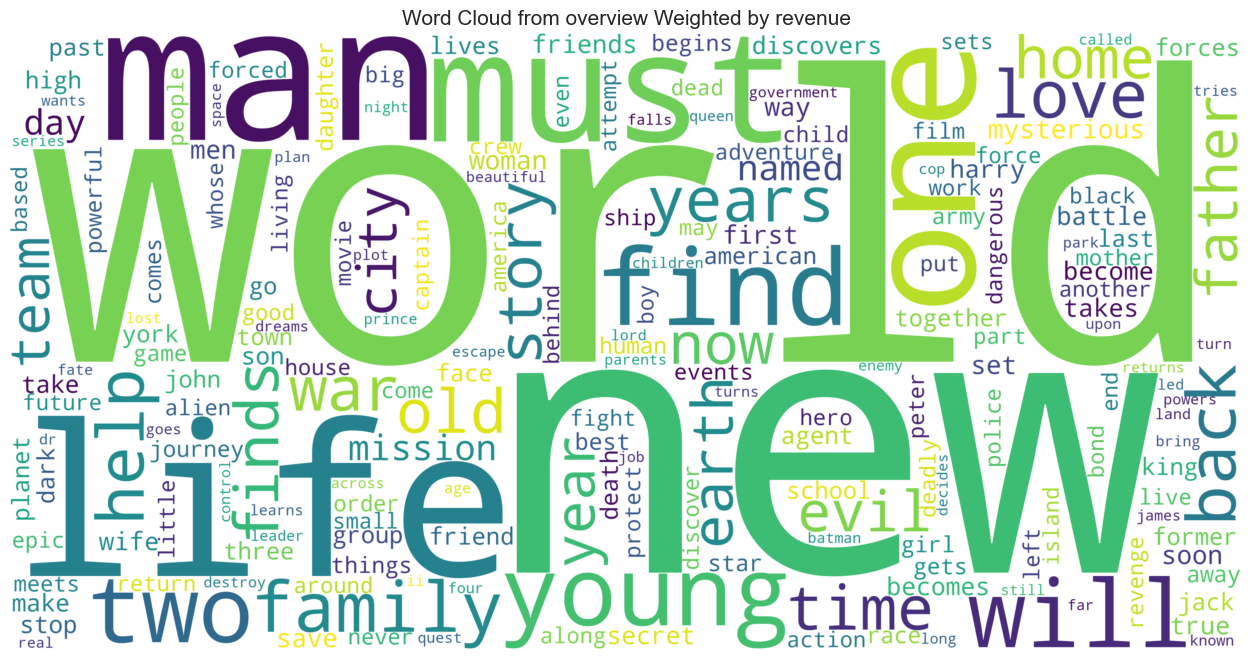

In [17]:
for _, row in df.iterrows():
    words = re.findall(r'\w+', row['overview'].lower())
        
    for word in words:
        if word not in enhanced_stopwords and len(word) > 1: 
            word_weights[word] += row['revenue']

wordcloud = WordCloud(stopwords=enhanced_stopwords, background_color='white', height=2000, width=4000).generate_from_frequencies(word_weights)
    
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud from {'overview'} Weighted by {'revenue'}')

Text(0.5, 1.0, 'Word Cloud from overview Weighted by return_rate')

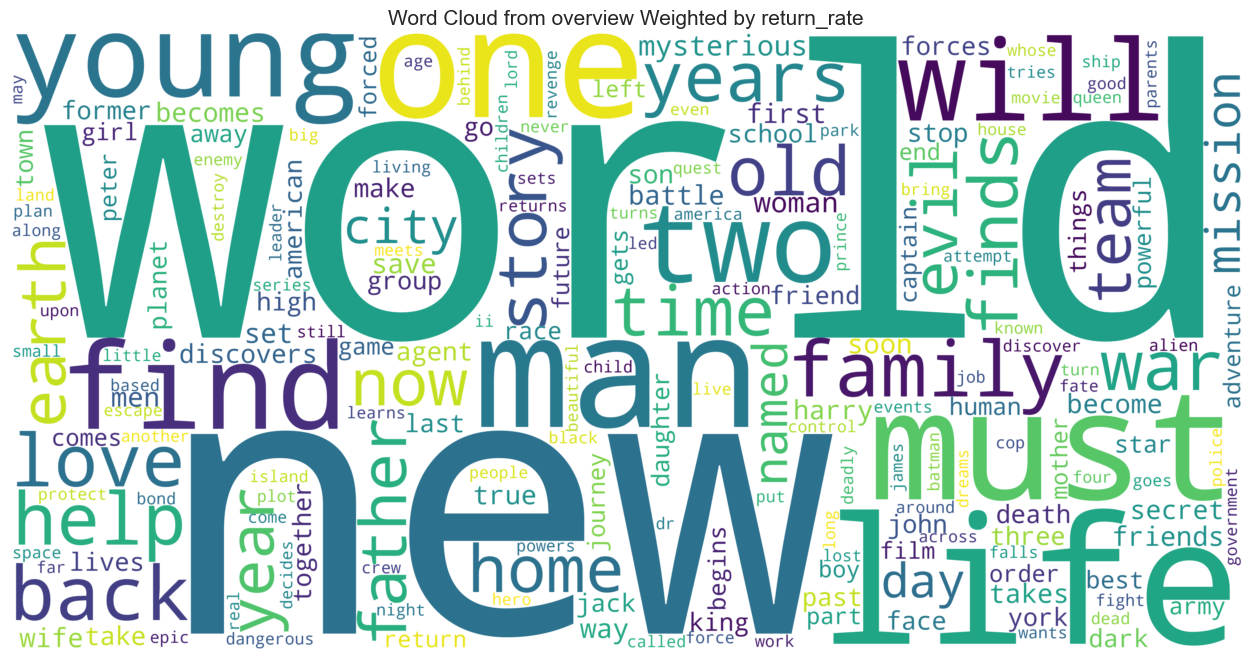

In [18]:
for _, row in df.iterrows():
    words = re.findall(r'\w+', row['overview'].lower())
        
    for word in words:
        if word not in enhanced_stopwords and len(word) > 1: 
            word_weights[word] += row['return_rate']

wordcloud = WordCloud(stopwords=enhanced_stopwords, background_color='white', height=2000, width=4000).generate_from_frequencies(word_weights)
    
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud from {'overview'} Weighted by {'return_rate'}')

In terms of the overview, we can clearly see the words **world** and **man**, which might indicate that most high-budget movies are filmed with a grand theme or focus on a specific character. 

The same applies to movies with high box office revenue, but from the other two words **new** and **life**, we can also recognize that audiences are more looking forward to new things and life-related themes.

The return on investment also shows us that grand perspective, novelty, and life story are likely essential elements in making a movie more successful according to the same three words.

### Which country makes most profitable Movies?

In [19]:
df['production_countries'] = df['production_countries'].fillna(
    '[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(
    lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
s = df.apply(lambda x: pd.Series(x['production_countries']), axis=1).stack(
).reset_index(level=1, drop=True)
s.name = 'countries'
con_df = df.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index(drop=True)
con_df.columns = ['num_movies', 'country']
con_df.head(10)

num_movies                   country
0        4262  United States of America
1         647            United Kingdom
2         366                    France
3         311                   Germany
4         229                    Canada
5         176                     India
6         117                 Australia
7         108                     Italy
8          87                     Japan
9          83                    Russia

In [20]:
df['spoken_languages'] = df['spoken_languages'].fillna(
    '[]').apply(ast.literal_eval)

df['spoken_languages'] = df['spoken_languages'].apply(
    lambda x: [i['name'] for i in x] if isinstance(x, list) else []
)

s = df.apply(lambda x: pd.Series(x['spoken_languages']), axis=1).stack(
).reset_index(level=1, drop=True)
s.name = 'language'

con_df = df.drop('spoken_languages', axis=1).join(s)

lang_count_df = pd.DataFrame(con_df['language'].value_counts()).reset_index()
lang_count_df.columns = ['language', 'num_movies']
lang_count_df = lang_count_df.reset_index(drop=True)
lang_count_df.head(10)

language  num_movies
0   English        4732
1  Français         478
2   Español         410
3   Deutsch         288
4   Pусский         273
5  Italiano         235
6       日本語         131
7    हिन्दी         125
8       普通话         118
9                    89

Unsurprisingly, the majority of movies in our existing data are produced in the United States and speaking english, nearly 80% of our total data. But are American movies definitely the most profitable? Which country's movies have the highest cost-effectiveness and returns? We will explore this next.

In [21]:
df_original = pd.read_csv('movies.csv')

df_original['revenue'] = pd.to_numeric(df_original['revenue'], errors='coerce')
df_original['budget'] = pd.to_numeric(df_original['budget'], errors='coerce')
df_original['return_rate'] = df_original['revenue'] / df_original['budget']
df_original[df_original['return_rate'].isnull()].shape

def safe_json_loads(x):
    try:
        return json.loads(x.replace("'", "\""))
    except json.JSONDecodeError:
        return []

df_original['production_countries'] = df_original['production_countries'].apply(lambda x: safe_json_loads(x) if pd.notna(x) else [])

expanded_movies_df = df_original.explode('production_countries')

expanded_movies_df['country'] = expanded_movies_df['production_countries'].apply(lambda x: x['name'] if isinstance(x, dict) else None)

country_stats = expanded_movies_df.groupby('country').agg(
    average_revenue=('revenue', 'mean'),
    average_budget=('budget', 'mean'),
    average_return_rate=('return_rate', 'mean'),
    movie_count=('id', 'count')
)

filtered_country_stats = country_stats[country_stats['movie_count'] >= 500]

sorted_country_stats_revenue = filtered_country_stats.sort_values(by='average_revenue', ascending=False).reset_index()
sorted_country_stats_budget = filtered_country_stats.sort_values(by='average_budget', ascending=False).reset_index()
sorted_country_stats_return_rate = filtered_country_stats.sort_values(by='average_return_rate', ascending=False).reset_index()


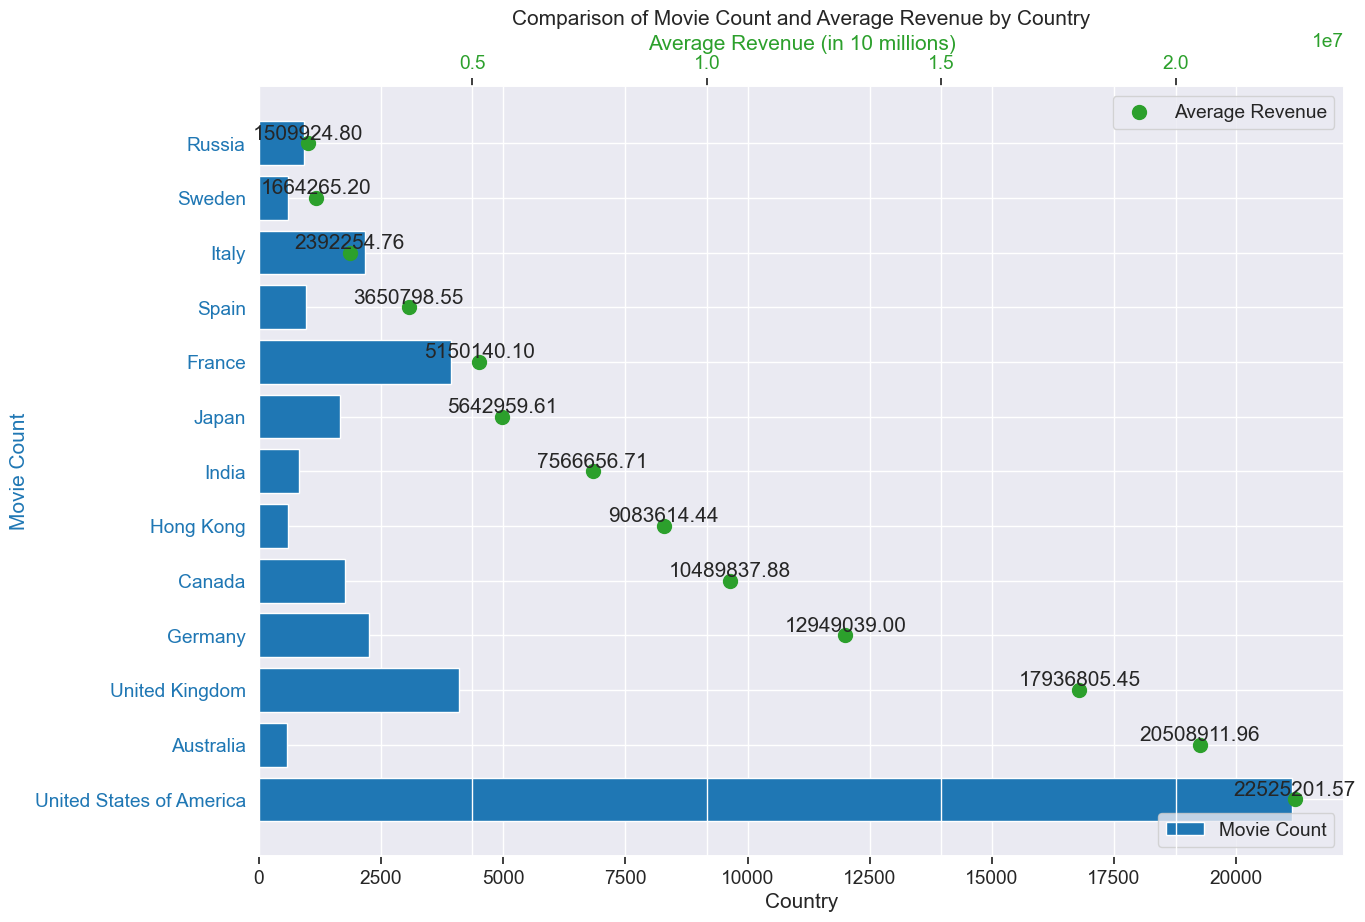

In [22]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 10))

# Set up the bar plot for movie counts
color = 'tab:blue'
ax1.set_xlabel('Country')
ax1.set_ylabel('Movie Count', color=color)
bars = ax1.barh(sorted_country_stats_revenue['country'], sorted_country_stats_revenue['movie_count'], color=color, label='Movie Count')
ax1.tick_params(axis='y', labelcolor=color)

# Set up the scatter plot for average revenue
ax2 = ax1.twiny()
color = 'tab:green'
ax2.set_xlabel('Average Revenue (in 10 millions)', color=color)
scatter = ax2.scatter(sorted_country_stats_revenue['average_revenue'], sorted_country_stats_revenue['country'], color=color, label='Average Revenue', s=100)
ax2.tick_params(axis='x', labelcolor=color)

# Add average revenue as text above the scatter points
for i, (avg_revenue, country) in enumerate(zip(sorted_country_stats_revenue['average_revenue'], sorted_country_stats_revenue['country'])):
    ax2.text(avg_revenue, 
             country, 
             f'{avg_revenue:.2f}', 
             va='bottom', 
             ha='center')

# Update legends
ax1.legend([bars], ['Movie Count'], loc='lower right')
ax2.legend(['Average Revenue'], loc='upper right')

plt.title('Comparison of Movie Count and Average Revenue by Country')
plt.show()


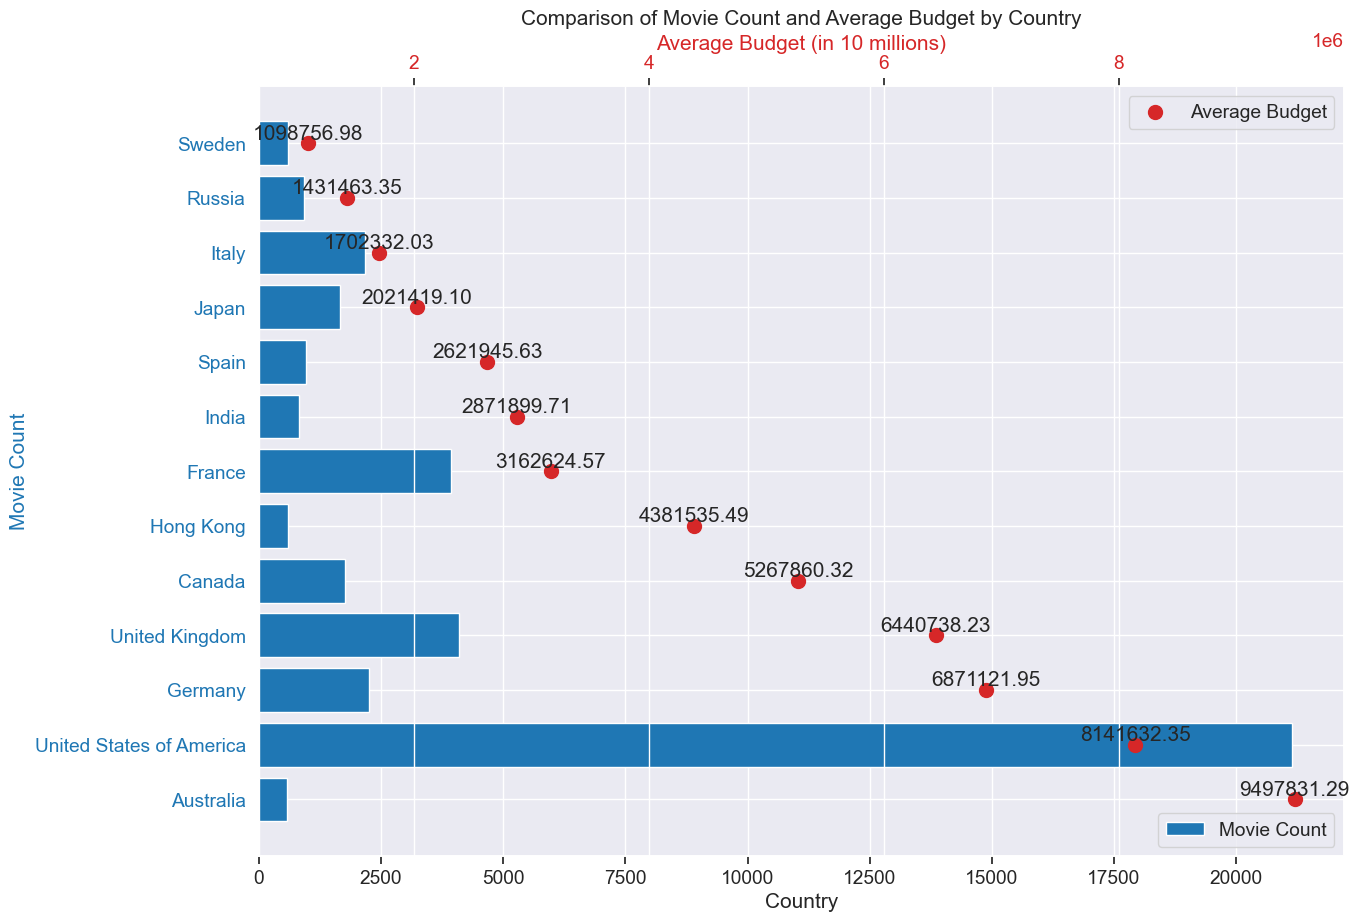

In [23]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 10))

# Set up the bar plot for movie counts
color = 'tab:blue'
ax1.set_xlabel('Country')
ax1.set_ylabel('Movie Count', color=color)
bars = ax1.barh(sorted_country_stats_budget['country'], sorted_country_stats_budget['movie_count'], color=color, label='Movie Count')
ax1.tick_params(axis='y', labelcolor=color)


# Set up the scatter plot for average budget
ax2 = ax1.twiny()
color = 'tab:red'
ax2.set_xlabel('Average Budget (in 10 millions)', color=color)
scatter = ax2.scatter(sorted_country_stats_budget['average_budget'], sorted_country_stats_budget['country'], color=color, label='Average Budget', s=100)
ax2.tick_params(axis='x', labelcolor=color)

# Add average budget as text above the scatter points
for i, (avg_budget, country) in enumerate(zip(sorted_country_stats_budget['average_budget'], sorted_country_stats_budget['country'])):
    ax2.text(avg_budget, 
             country, 
             f'{avg_budget:.2f}', 
             va='bottom', 
             ha='center')

# Update legends
ax1.legend([bars], ['Movie Count'], loc='lower right')
ax2.legend(['Average Budget'], loc='upper right')

plt.title('Comparison of Movie Count and Average Budget by Country')
plt.show()


We can see that even though the United States produces the most films, their average production cost is still not the highest. 

The average cost of making a film in Australia is about $9.5 million, and the revenue is about $20.5 million, making it the country with the highest film production costs in the world. 

In contrast, the United States has the highest average revenue per film worldwide, with an average revenue of $22.52 million per film and an average production cost of about $8.14 million. This might be a little-known fact because Australia's film industry isn't very well-known.

### What is the most successful Franchise?

In [24]:
df_fran = df[df['belongs_to_collection'].notnull()]
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]

fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

fran_pivot.sort_values('sum', ascending=False).head(10)

belongs_to_collection  count          mean           sum
210              Harry Potter Collection      8  9.634209e+08  7.707367e+09
246                James Bond Collection     25  2.818948e+08  7.047370e+09
418                 Star Wars Collection      7  9.512995e+08  6.659097e+09
477  The Fast and the Furious Collection      8  6.406373e+08  5.125099e+09
338  Pirates of the Caribbean Collection      5  9.043154e+08  4.521577e+09
575              Transformers Collection      5  8.732202e+08  4.366101e+09
140             Despicable Me Collection      4  9.227676e+08  3.691070e+09
556              The Twilight Collection      5  6.684215e+08  3.342107e+09
236                   Ice Age Collection      5  6.433417e+08  3.216709e+09
256             Jurassic Park Collection      4  7.578710e+08  3.031484e+09

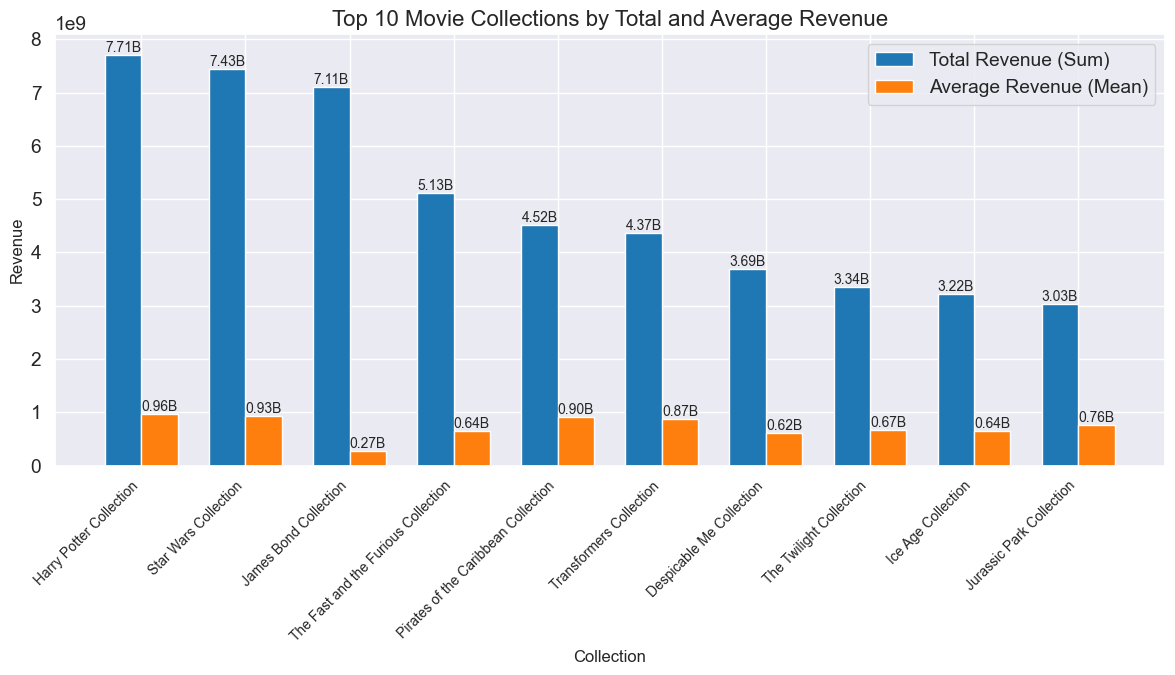

In [59]:

collection = [
    'Harry Potter Collection', 'Star Wars Collection', 'James Bond Collection',
    'The Fast and the Furious Collection', 'Pirates of the Caribbean Collection',
    'Transformers Collection', 'Despicable Me Collection', 'The Twilight Collection',
    'Ice Age Collection', 'Jurassic Park Collection'
]
mean_values = [9.634209e+08, 9.293118e+08, 2.733450e+08, 6.406373e+08, 9.043154e+08,
               8.732202e+08, 6.151784e+08, 6.684215e+08, 6.433417e+08, 7.578710e+08]
sum_values = [7.707367e+09, 7.434495e+09, 7.106970e+09, 5.125099e+09, 4.521577e+09,
              4.366101e+09, 3.691070e+09, 3.342107e+09, 3.216709e+09, 3.031484e+09]
count_values = [8, 8, 26, 8, 5, 5, 6, 5, 5, 4]

fig, ax1 = plt.subplots(figsize=(12, 7))

# Bar width and positions
bar_width = 0.35
index = np.arange(len(collection))

# Plot bars for sum_values
bars1 = ax1.bar(index, sum_values, bar_width, color='tab:blue', label='Total Revenue (Sum)')

# Plot bars for mean_values
bars2 = ax1.bar(index + bar_width, mean_values, bar_width, color='tab:orange', label='Average Revenue (Mean)')

# Set axis labels and title
ax1.set_xlabel('Collection', fontsize=12)
ax1.set_ylabel('Revenue', fontsize=12)
ax1.set_title('Top 10 Movie Collections by Total and Average Revenue', fontsize=16)

# Set x-axis tick labels
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(collection, rotation=45, ha='right', fontsize=10)

# Annotate bars with sum and mean values
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval/1e9:.2f}B', ha='center', va='bottom', fontsize=10)
for bar in bars2:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval/1e9:.2f}B', ha='center', va='bottom', fontsize=10)

# Add a legend
ax1.legend(loc='upper right')

# Adjust layout to prevent clipping of tick labels
fig.tight_layout()

# Show the plot
plt.show()


Among the top 10 movie collections by revenue, the **Harry Potter Collection** stands out as the highest-grossing franchise, amassing an impressive total revenue of $7.71 billion across 8 movies, averaging $963.4 million per film. On the other end of the spectrum, the **Jurassic Park Collection** ranks as the lowest-grossing among the top 10, generating $3.03 billion from 4 movies, with an average revenue of $757.9 million per film.

Notably, the **James Bond Collection** is the most prolific, with 26 movies contributing to a significant total revenue of $7.11 billion. Despite this vast output, the collection's average revenue per movie sits at a comparatively modest $273.3 million.

In [26]:
fran_pivot.sort_values('mean', ascending=False).head(10)

belongs_to_collection  count          mean           sum
53                     Avatar Collection      1  2.787965e+09  2.787965e+09
452              The Avengers Collection      2  1.462481e+09  2.924962e+09
189                    Frozen Collection      1  1.274219e+09  1.274219e+09
177              Finding Nemo Collection      2  9.844532e+08  1.968906e+09
491                The Hobbit Collection      3  9.785078e+08  2.935523e+09
513     The Lord of the Rings Collection      3  9.721816e+08  2.916545e+09
210              Harry Potter Collection      8  9.634209e+08  7.707367e+09
418                 Star Wars Collection      7  9.512995e+08  6.659097e+09
140             Despicable Me Collection      4  9.227676e+08  3.691070e+09
338  Pirates of the Caribbean Collection      5  9.043154e+08  4.521577e+09

Among these film franchises, when comparing the average revenue per film, The **Avengers Collection** tops the list with a staggering average of $1.4625 billion per film, showcasing its extraordinary global appeal. In contrast, the **Transformers Collection** series ranks at the bottom with an average revenue of $873.22 million per film, still a respectable performance despite being at the lower end. 

Other notable franchises include **Avatar Collection** and **Finding Nemo Collection**, both maintaining strong average revenues. It's worth noting that despite both containing eight films, the **Harry Potter Collection** and **Star Wars Collection** franchises still boast average revenues of over $900 million, further cementing their enduring appeal among audiences.

In [27]:
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='budget', aggfunc={'budget': ['mean', 'sum', 'count']}).reset_index()

fran_pivot.sort_values('sum', ascending=False).head(10)

belongs_to_collection  count          mean           sum
246                James Bond Collection     25  6.154800e+07  1.538700e+09
210              Harry Potter Collection      8  1.600000e+08  1.280000e+09
338  Pirates of the Caribbean Collection      5  2.500000e+08  1.250000e+09
477  The Fast and the Furious Collection      8  1.261250e+08  1.009000e+09
615                     X-Men Collection      6  1.638333e+08  9.830000e+08
575              Transformers Collection      5  1.930000e+08  9.650000e+08
418                 Star Wars Collection      7  1.204786e+08  8.433500e+08
491                The Hobbit Collection      3  2.500000e+08  7.500000e+08
551            The Terminator Collection      5  1.322800e+08  6.614000e+08
303       Mission: Impossible Collection      5  1.300000e+08  6.500000e+08

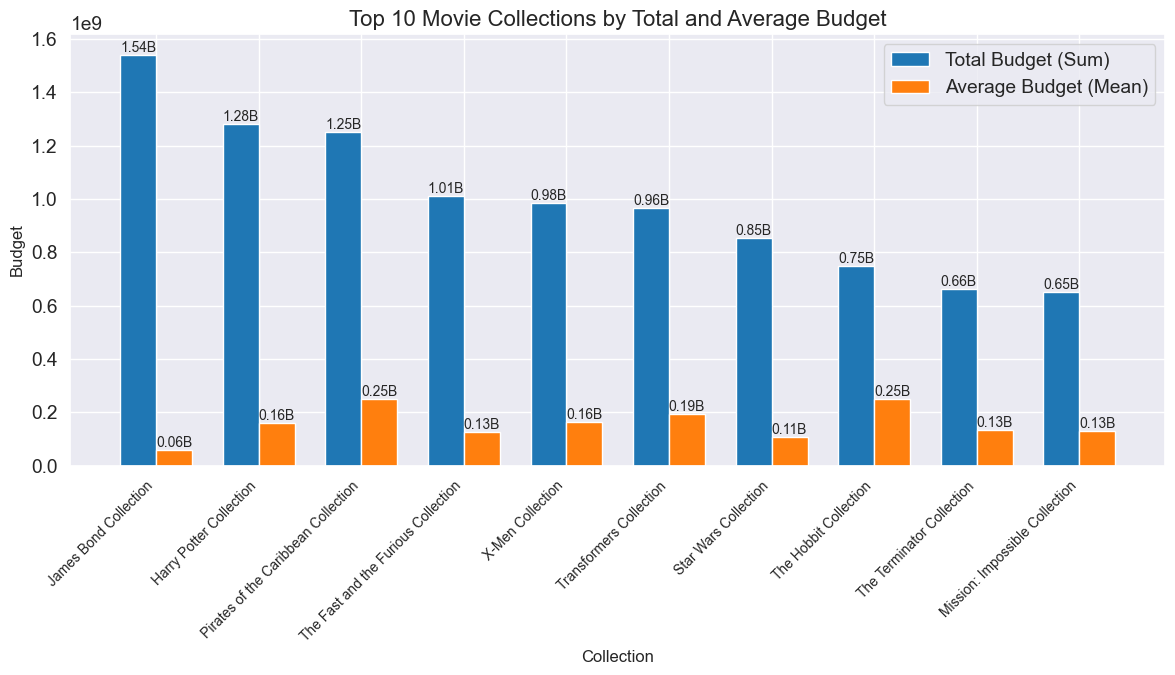

In [58]:

collection_budget = [
    'James Bond Collection', 'Harry Potter Collection', 'Pirates of the Caribbean Collection',
    'The Fast and the Furious Collection', 'X-Men Collection', 'Transformers Collection',
    'Star Wars Collection', 'The Hobbit Collection', 'The Terminator Collection',
    'Mission: Impossible Collection'
]
mean_budget_values = [5.921731e+07, 1.600000e+08, 2.500000e+08, 1.261250e+08,
                      1.638333e+08, 1.930000e+08, 1.067938e+08, 2.500000e+08,
                      1.322800e+08, 1.300000e+08]
sum_budget_values = [1.539650e+09, 1.280000e+09, 1.250000e+09, 1.009000e+09,
                     9.830000e+08, 9.650000e+08, 8.543500e+08, 7.500000e+08,
                     6.614000e+08, 6.500000e+08]
count_budget_values = [26, 8, 5, 8, 6, 5, 8, 3, 5, 5]


fig, ax1 = plt.subplots(figsize=(12, 7))


bar_width = 0.35
index = np.arange(len(collection_budget))


bars1 = ax1.bar(index, sum_budget_values, bar_width, color='tab:blue', label='Total Budget (Sum)')

bars2 = ax1.bar(index + bar_width, mean_budget_values, bar_width, color='tab:orange', label='Average Budget (Mean)')

ax1.set_xlabel('Collection', fontsize=12)
ax1.set_ylabel('Budget', fontsize=12)
ax1.set_title('Top 10 Movie Collections by Total and Average Budget', fontsize=16)

ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(collection_budget, rotation=45, ha='right', fontsize=10)

for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval/1e9:.2f}B', ha='center', va='bottom', fontsize=10)
for bar in bars2:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval/1e9:.2f}B', ha='center', va='bottom', fontsize=10)

ax1.legend(loc='upper right')

fig.tight_layout()

plt.show()


In terms of production budgets, the **Pirates of the Caribbean Collection** claims the title of the most lavish, with an average budget of $250 million per movie across 5 films, culminating in a total budget of $1.25 billion. Meanwhile, the **James Bond Collection** showcases efficiency, maintaining an average budget of just $59.2 million per movie across its 26-film lineup, resulting in a total production budget of $1.54 billion.

The collection with the largest overall budget is, unsurprisingly, the **James Bond Collection**, with a cumulative production cost of $1.54 billion. In contrast, the **Mission: Impossible Collection** operates with a more conservative budget, totaling $650 million across 5 movies.

In [29]:
fran_pivot.sort_values('mean', ascending=False).head(10)

belongs_to_collection  count         mean           sum
436                   Tangled Collection      1  260000000.0  2.600000e+08
452              The Avengers Collection      2  250000000.0  5.000000e+08
491                The Hobbit Collection      3  250000000.0  7.500000e+08
338  Pirates of the Caribbean Collection      5  250000000.0  1.250000e+09
289              Man of Steel Collection      2  237500000.0  4.750000e+08
53                     Avatar Collection      1  237000000.0  2.370000e+08
446    The Amazing Spider-Man Collection      2  207500000.0  4.150000e+08
610               World War Z Collection      1  200000000.0  2.000000e+08
410                Spider-Man Collection      3  199000000.0  5.970000e+08
470           The Dark Knight Collection      3  195000000.0  5.850000e+08

### What's the most profitable genre?

When it comes to movie genres, everyone has different preferences. But we wanted to do some analysis to find a relationship between the genre of movies and their commercial success.

In [30]:
def extract_genres(genres_str):
    try:
        genres_list = json.loads(genres_str.replace("'", "\""))
        return ', '.join([genre['name'] for genre in genres_list])
    except:
        return None
movie_data['parsed_genres'] = movie_data['genres'].apply(extract_genres)
movie_data['primary_genre'] = movie_data['parsed_genres'].apply(lambda x: x.split(',')[0] if x else None)
genre_financials = movie_data.groupby('primary_genre')[['budget', 'revenue']].mean().dropna()
genre_counts = movie_data['primary_genre'].value_counts()
genre_financials['count'] = genre_counts
genre_financials.dropna(inplace=True)
sorted_genres_by_revenue = genre_financials.sort_values('revenue', ascending=False)
sorted_genres_by_budget = genre_financials.sort_values('budget', ascending=False)



Let’s first take a look at the proportion distribution of all movie genre in our data set.

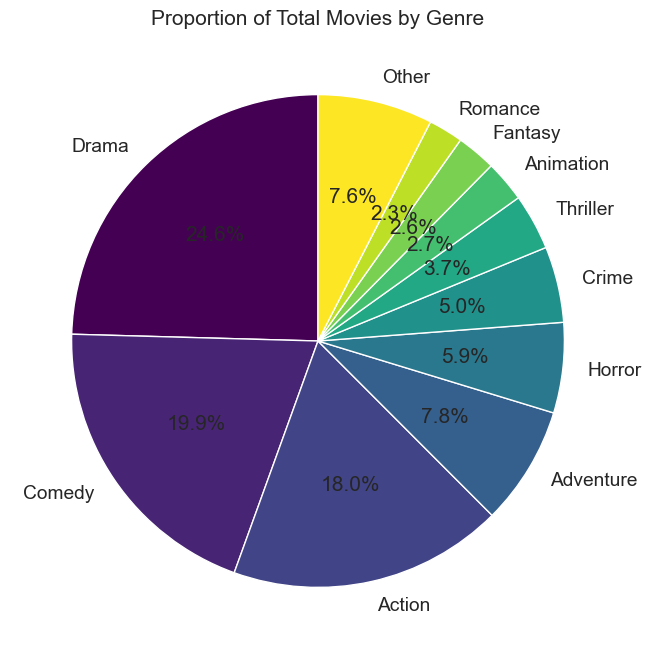

In [31]:
plt.figure(figsize=(8, 8))
small_genres = genre_counts[genre_counts / genre_counts.sum() * 100 < 2]
other_sum = small_genres.sum()
genre_counts = genre_counts[genre_counts / genre_counts.sum() * 100 >= 2]
genre_counts['Other'] = other_sum
genre_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Proportion of Total Movies by Genre')
plt.ylabel('')
plt.show()

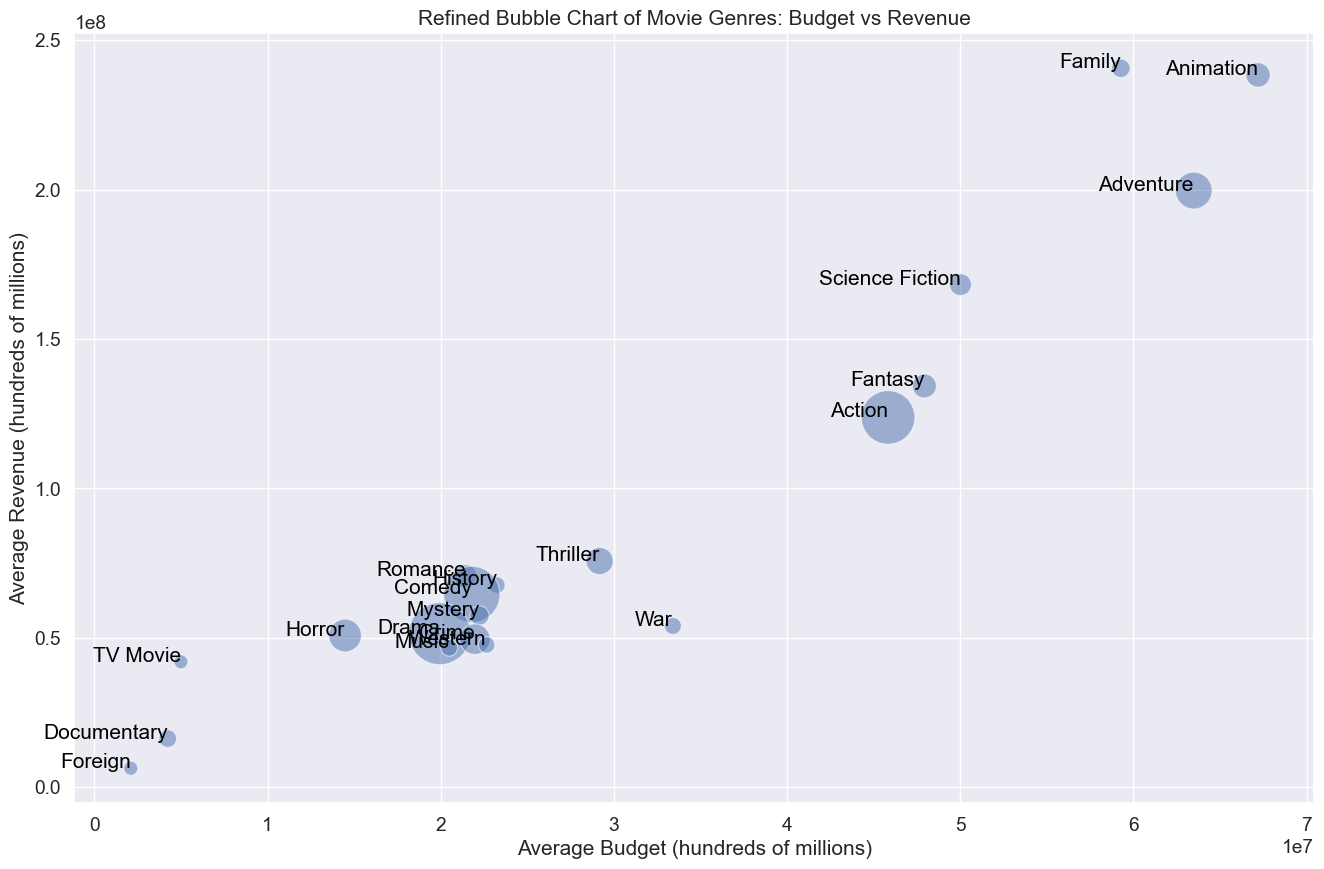

In [32]:
plt.figure(figsize=(16, 10))
bubble_plot = sns.scatterplot(data=sorted_genres_by_revenue, x='budget', y='revenue', size='count', legend=False, sizes=(100, 2000), alpha=0.5)
plt.title('Refined Bubble Chart of Movie Genres: Budget vs Revenue')
plt.xlabel('Average Budget (hundreds of millions)')
plt.ylabel('Average Revenue (hundreds of millions)')
plt.grid(True)
for index, row in sorted_genres_by_revenue.iterrows():
    bubble_plot.text(row['budget'], row['revenue'], index, color='black', ha='right')
plt.show()

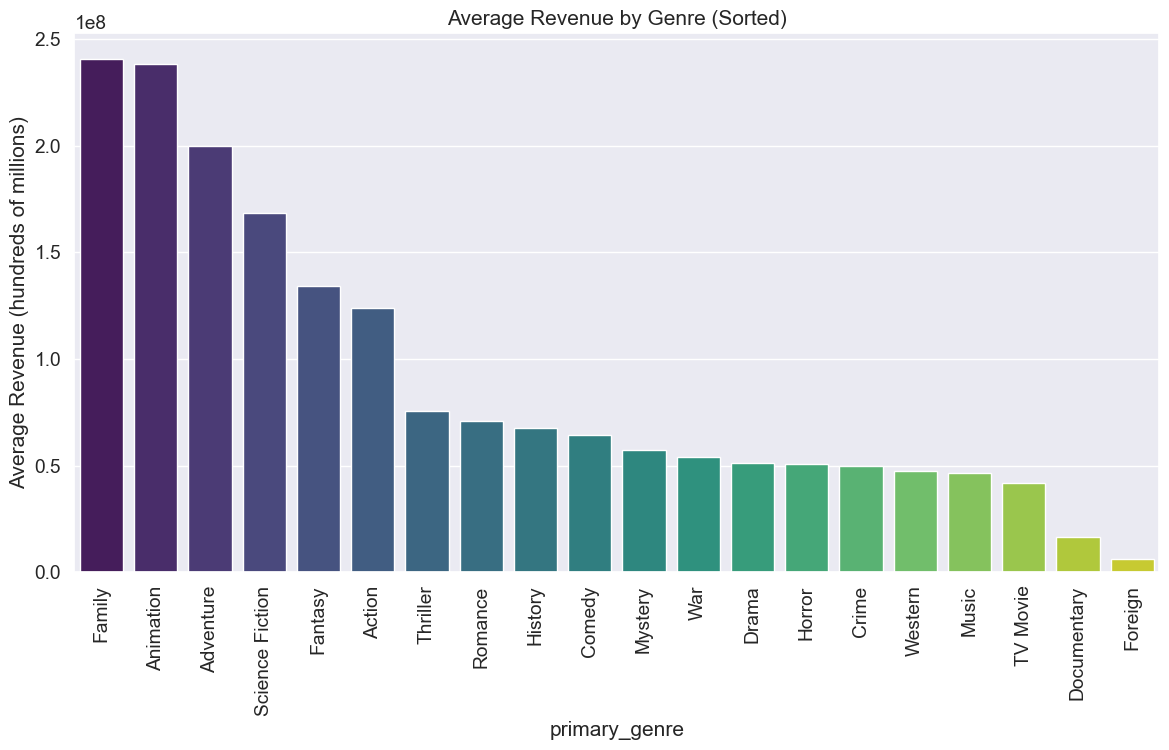

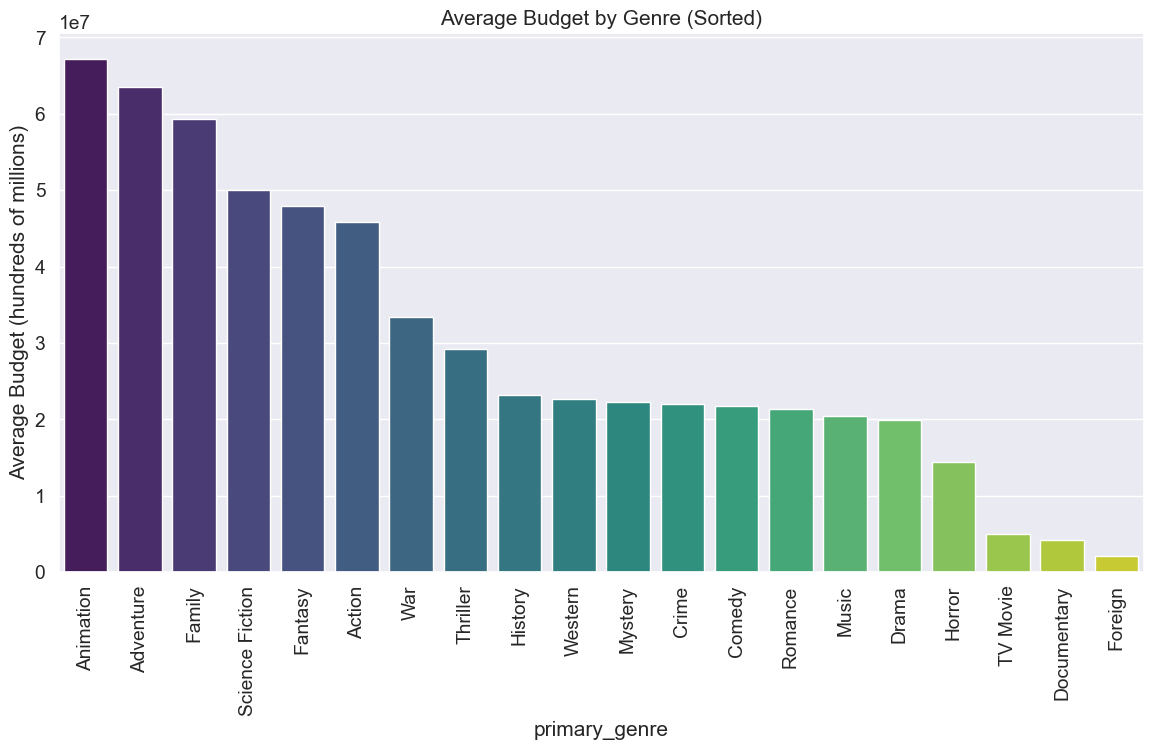

In [33]:
plt.figure(figsize=(14, 7))
sns.barplot(x=sorted_genres_by_revenue.index, y='revenue', data=sorted_genres_by_revenue, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Revenue by Genre (Sorted)')
plt.ylabel('Average Revenue (hundreds of millions)')
plt.show()


plt.figure(figsize=(14, 7))
sns.barplot(x=sorted_genres_by_budget.index, y='budget', data=sorted_genres_by_budget, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Budget by Genre (Sorted)')
plt.ylabel('Average Budget (hundreds of millions)')
plt.show()

### Do votes matter?

Although we may already know that a commercially successful film will not necessarily receive higher ratings from audiences, and vice versa. But we still want to thoroughly explore how much connection a movie's score has with its commercial success?

In [34]:
df['parsed_genres'] = df['genres'].apply(extract_genres)
df['primary_genre'] = df['parsed_genres'].apply(lambda x: x.split(',')[0] if x else None)

def extract_genres(genres_str):
    try:
        genres_list = json.loads(genres_str.replace("'", "\""))
        return ', '.join([genre['name'] for genre in genres_list])
    except:
        return None

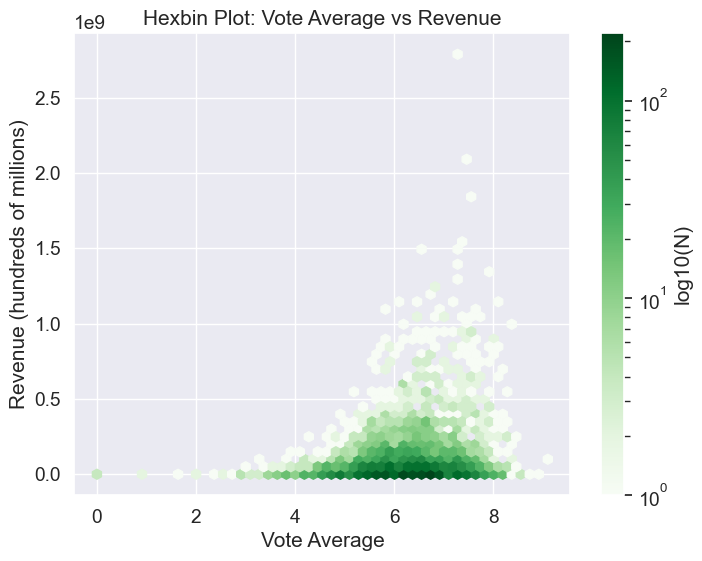

In [35]:
plt.figure(figsize=(8, 6))
plt.hexbin(df['vote_average'], df['revenue'], gridsize=50, cmap='Greens', bins='log')
plt.colorbar(label='log10(N)')
plt.title('Hexbin Plot: Vote Average vs Revenue')
plt.xlabel('Vote Average')
plt.ylabel('Revenue (hundreds of millions)')
plt.show()

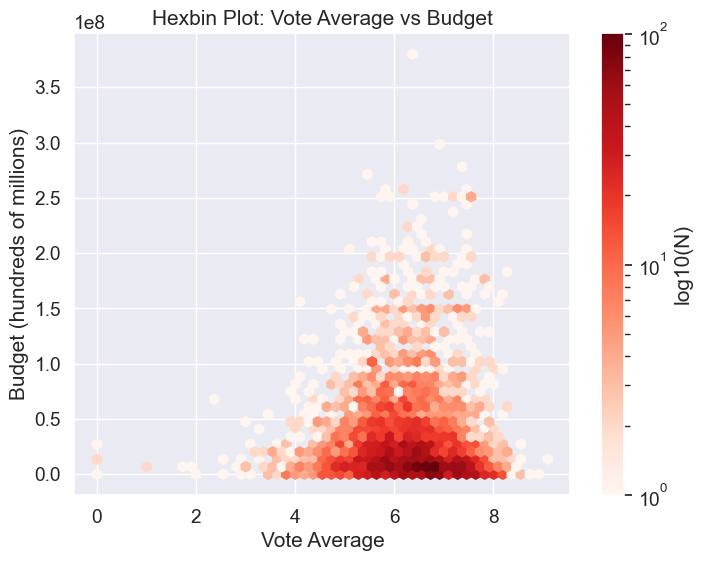

In [36]:
plt.figure(figsize=(8, 6))
plt.hexbin(df['vote_average'], df['budget'], gridsize=50, cmap='Reds', bins='log')
plt.colorbar(label='log10(N)')
plt.title('Hexbin Plot: Vote Average vs Budget')
plt.xlabel('Vote Average')
plt.ylabel('Budget (hundreds of millions)')
plt.show()

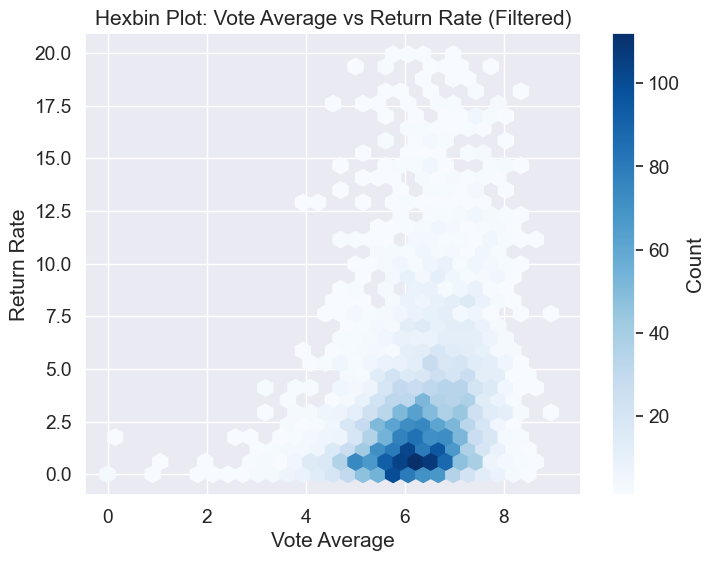

In [37]:

filtered_movie_data = df[df['return_rate'] <= 20]

plt.figure(figsize=(8, 6))
plt.hexbin(
    filtered_movie_data['vote_average'],
    filtered_movie_data['return_rate'],
    gridsize=30,
    cmap='Blues',
    mincnt=1
)
plt.colorbar(label='Count')
plt.title('Hexbin Plot: Vote Average vs Return Rate (Filtered)')
plt.xlabel('Vote Average')
plt.ylabel('Return Rate')
plt.show()


In all of the above graphs, we can generally find that costs and benefits do not show a positive or negative correlation with ratings, and that the vast majority of films fall within a range of about four to eight. In the graph about returns we can again recognise that the vast majority of more commercially successful films do not receive a lower rating, but very high ratings do not imply extremely high returns either. This could mean that the most commercially acceptable films are more likely to have a higher return on investment, in short, a film that makes money is not necessarily of high artistic merit.

At this point, we can try to filter out the film entries with less than 1000 votes and graph them again to see how the relatively more famous films perform

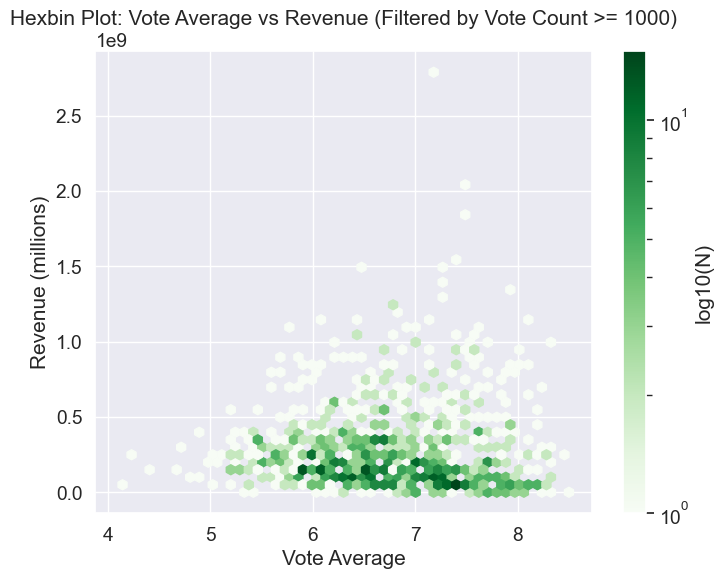

In [38]:
filtered_movie_data = df[df['vote_count'] >= 1000]

plt.figure(figsize=(8, 6))
plt.hexbin(filtered_movie_data['vote_average'], filtered_movie_data['revenue'], gridsize=50, cmap='Greens', bins='log')
plt.colorbar(label='log10(N)')
plt.title('Hexbin Plot: Vote Average vs Revenue (Filtered by Vote Count >= 1000)')
plt.xlabel('Vote Average')
plt.ylabel('Revenue (millions)')
plt.show()


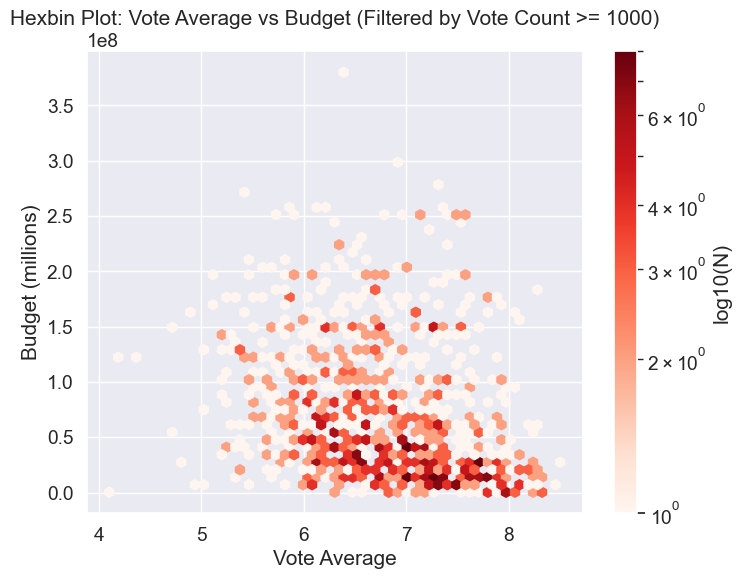

In [39]:
filtered_movie_data = df[df['vote_count'] >= 1000]
plt.figure(figsize=(8, 6))
plt.hexbin(
    filtered_movie_data['vote_average'],
    filtered_movie_data['budget'],
    gridsize=50,
    cmap='Reds',
    bins='log'
)
plt.colorbar(label='log10(N)')
plt.title('Hexbin Plot: Vote Average vs Budget (Filtered by Vote Count >= 1000)')
plt.xlabel('Vote Average')
plt.ylabel('Budget (millions)')
plt.show()

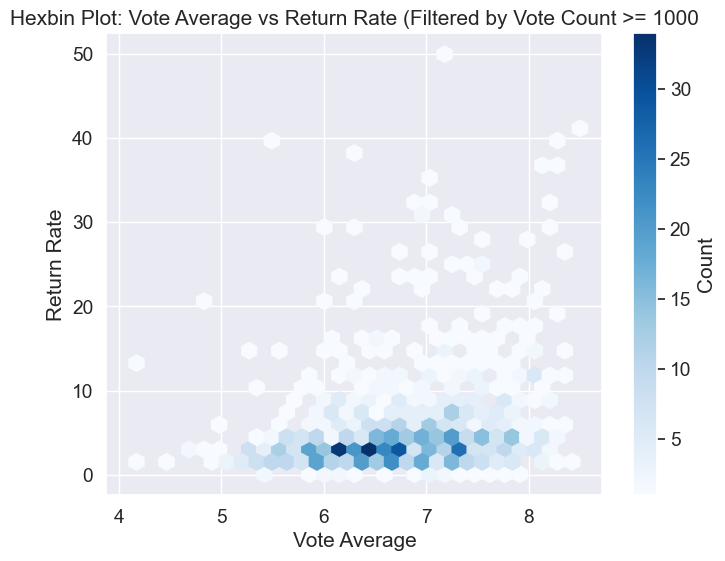

In [40]:
filtered_movie_data = df[(df['vote_count'] >= 1000)]

plt.figure(figsize=(8, 6))
plt.hexbin(
    filtered_movie_data['vote_average'],
    filtered_movie_data['return_rate'],
    gridsize=30,
    cmap='Blues',
    mincnt=1
)
plt.colorbar(label='Count')
plt.title('Hexbin Plot: Vote Average vs Return Rate (Filtered by Vote Count >= 1000')
plt.xlabel('Vote Average')
plt.ylabel('Return Rate')
plt.show()


Here, we can see that even among relatively famous films, costs and benefits do not have any direct correlation with ratings, which is a very intuitive conclusion for us.



According to our observations, suppose we take films with ratings greater than 7.5 as so-called great films and analyse them, what would happen?

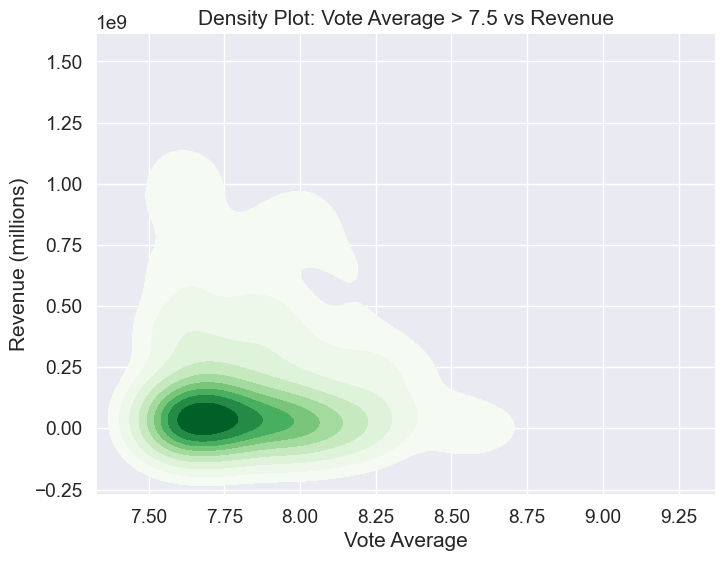

In [41]:
filtered_movie_data = df[(df['vote_average'] > 7.5)]
plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=filtered_movie_data,
    x='vote_average',
    y='revenue',
    fill=True,
    cmap='Greens'
)
plt.title('Density Plot: Vote Average > 7.5 vs Revenue')
plt.xlabel('Vote Average')
plt.ylabel('Revenue (millions)')
plt.show()

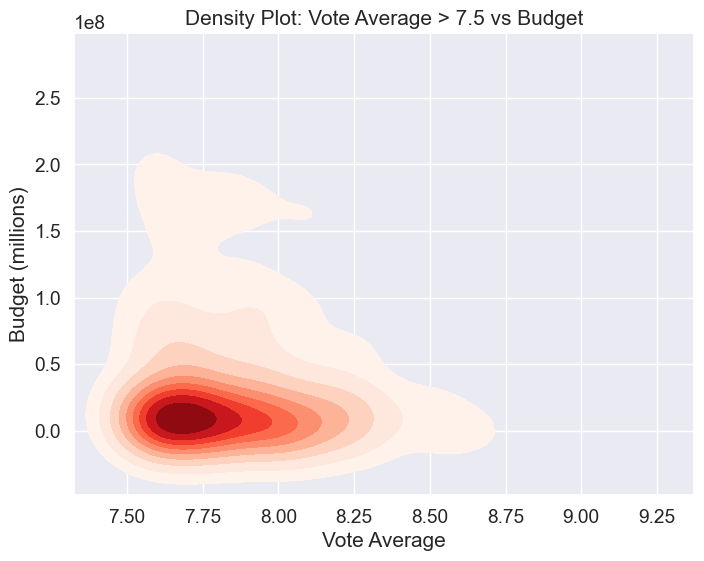

In [42]:
filtered_movie_data = df[(df['vote_average'] > 7.5)]
plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=filtered_movie_data,
    x='vote_average',
    y='budget',
    fill=True,
    cmap='Reds'
)
plt.title('Density Plot: Vote Average > 7.5 vs Budget')
plt.xlabel('Vote Average')
plt.ylabel('Budget (millions)')
plt.show()

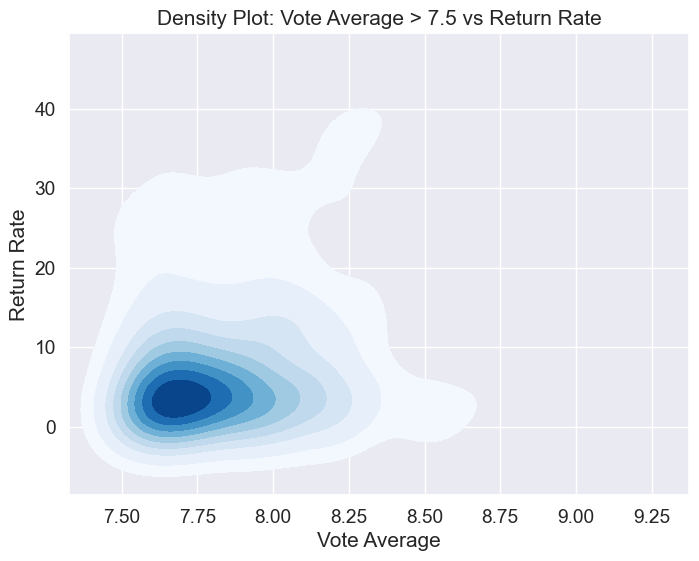

In [43]:
filtered_movie_data = df[(df['vote_average'] > 7.5)]
plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=filtered_movie_data,
    x='vote_average',
    y='return_rate',
    fill=True,
    cmap='Blues'
)
plt.title('Density Plot: Vote Average > 7.5 vs Return Rate')
plt.xlabel('Vote Average')
plt.ylabel('Return Rate')
plt.show()

The graphs reveal that while high-rated movies generally have budgets and revenues clustered in lower ranges, a select few with ratings above 8.0 don't show significantly higher budgets and revenues. Overall, it's obviously not true that movies with higher ratings tend to have proportionally higher budgets and revenues, which suggests that we can't simply make a direct link between a film's financial figures and its artistic success or failure.The vast majority of high-scoring films will have returns concentrated within the 0 to 5 range.

### Are films more profitable now than they once were?

Let me start by looking at the trends in film revenues and costs over time

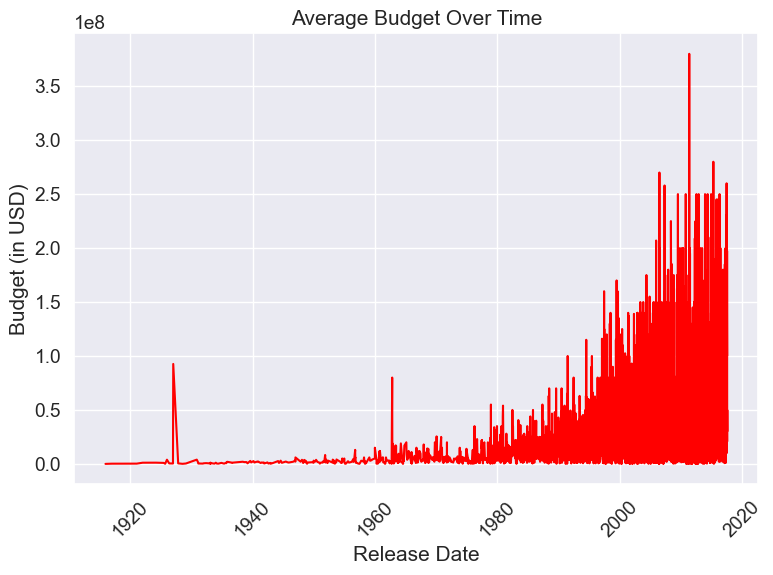

In [44]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='release_date', y='budget', data=df, estimator='mean', ci=None, color='red')
plt.xlabel('Release Date')
plt.ylabel('Budget (in USD)')
plt.title('Average Budget Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


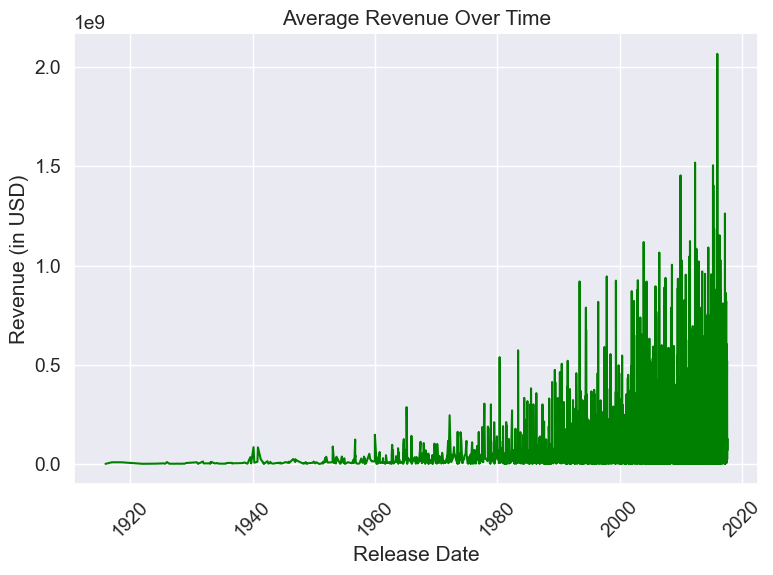

In [45]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='release_date', y='revenue', data=df, estimator='mean', ci=None, color='green')
plt.xlabel('Release Date')
plt.ylabel('Revenue (in USD)')
plt.title('Average Revenue Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


It is quite common sense to see that the costs and revenues of the film industry are gradually increasing as time changes. But what about the profitability of films?

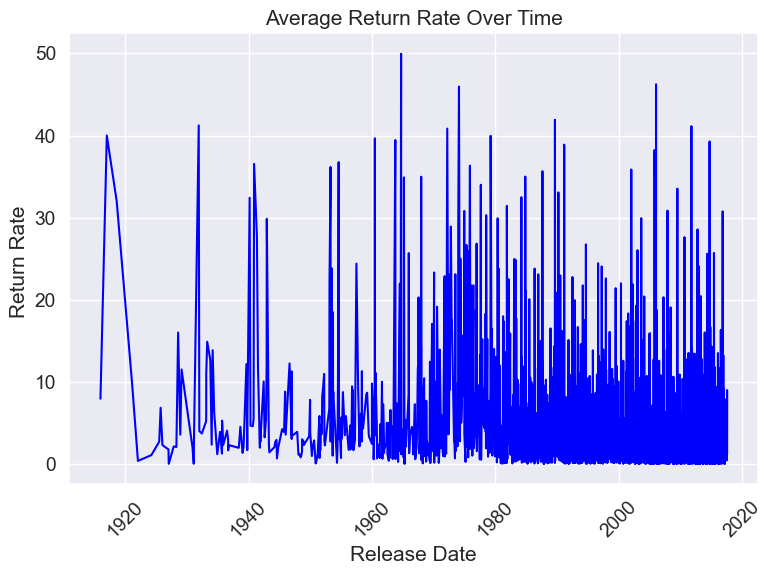

In [46]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='release_date', y='return_rate', data=df, estimator='mean', ci=None, color='blue')
plt.xlabel('Release Date')
plt.ylabel('Return Rate ')
plt.title('Average Return Rate Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In fact, we would be very surprised to find that after the 1960s, when the film industry was gradually maturing, the return on investment for films did not change much, and even fell overall in recent years.

In [5]:
movies_df_clean = df[['release_date', 'budget', 'revenue', 'title']]
movies_df_clean['year'] = movies_df_clean['release_date'].dt.year
movies_df_clean['month_year'] = movies_df_clean['release_date'].dt.strftime('%Y-%m')


frames = []
unique_years = sorted(movies_df_clean['year'].unique())
for year in unique_years:
    cumulative_data = movies_df_clean[movies_df_clean['year'] <= year].copy()
    cumulative_data['frame'] = year
    frames.append(cumulative_data)
cumulative_df = pd.concat(frames, ignore_index=True)

# Generate the Interactive Cumulative Timeline
fig = px.scatter(cumulative_df, x='budget', y='revenue', animation_frame='frame', animation_group='month_year',
                 size='revenue', color='budget', hover_name='title',
                 title='Interactive Cumulative Timeline (Budget vs Revenue)',
                 labels={'budget': 'Budget ($)', 'revenue': 'Revenue ($)', 'month_year': 'Month-Year'},
                 log_x=True, log_y=True,
                 range_x=[1e5, 1e9], range_y=[1e5, 1e10],
                 hover_data={'title': False, 'frame': False, 'month_year': True})

output_file = "budget_revenue_timeline.html"
fig.write_html(output_file)

fig.show()  # Removed output_file as it is not a valid argument for fig.show()

NameError: name 'df' is not defined

## Genre

### Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?

We choosed **Feature Distinction**, **Object Continuity** and **Consistent Visual Platform** as our main Visual Narrative.

**Feature distinction** in visual narratives emphasizes the unique aspects of each film characteristic being discussed. By visually separating different features, such as casting choices, plot structure, and cinematography styles, this approach makes it easier for the reader to discern and understand their individual contributions to a film's commercial success. For instance, using distinct icons, colors, or visual styles for each feature allows readers to quickly identify patterns or trends related to specific aspects. This clarity helps in comprehending how each feature independently influences the commercial outcome.

**Object continuity** ensures a consistent representation of key elements throughout the article. For instance, maintaining the same icons, symbols, or illustrations when referring to particular aspects like marketing strategies or directorial styles creates a visual thread that ties the narrative together. This continuity aids comprehension by reinforcing associations between visual cues and their corresponding concepts. Readers can more easily follow the discussion across different sections, facilitating a cohesive understanding of how various aspects interrelate and contribute to a film's commercial success.

A **consistent visual platform** provides a unified aesthetic framework for the article. By employing a uniform design style across charts, infographics, and other visual elements, the platform ensures that the visual narrative remains cohesive. This consistency not only makes the article visually appealing but also aids in comprehension by providing a predictable structure. For instance, consistent use of typography, color schemes, and layout enables readers to focus on the content rather than adjusting to new visual paradigms. This approach ultimately supports the analysis by allowing readers to intuitively interpret the relationship between film aspects and commercial success.

### Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

We choosed **Linear**, **Very Limited Interactivity** and **Introductory Text** as our main Narrative Structure.

The use of a **linear** narrative structure allows for a clear, chronological progression of information. This structure ensures that the reader can follow the evolution of the film's various aspects, such as plot, characters, and themes, in a logical sequence. When analyzing the relationship between these elements and the film's commercial success, the **linear** approach helps demonstrate cause-and-effect relationships. For instance, the reader can trace how early production decisions influenced later marketing strategies and ultimately affected box office performance.

Incorporating **very limited interactivity**, enhances the reader's engagement without overwhelming them. This structure provides an element of control over the reading experience, allowing the reader to delve deeper into specific sections of interest, like production details or marketing strategies. The limited interactivity offers a curated experience that guides readers through a structured narrative while still letting them explore the aspects of film and commercial success that interest them the most.

An **introductory** text serves as a roadmap, giving the reader a clear understanding of what to expect in the article. It sets the context by briefly summarizing the main points to be covered, such as the relationship between different film aspects and commercial success. This initial overview helps to establish the reader's expectations and provides a conceptual framework that facilitates comprehension. By laying this groundwork, the reader is better prepared to understand the more detailed analysis that follows in the subsequent sections of the article.

## Discussion

### What went well?

- The project successfully highlighted the unique aspects of each movie characteristic, such as genres and budgets, which made it easy to identify trends related to movie success.
- Consistent visual elements (like icons and symbols) ensured that key aspects, like marketing strategies, were easy to follow throughout the analysis.
- The cohesive design style across all charts and visuals provided a unified, predictable structure that helped readers focus on the content.

### What is still missing? What could be improved? Why?

- We can includ additional data, such as marketing budgets and social media presence, would give us a more comprehensive understanding of their impact on a movie's success.
- Expanding the dataset to include data from streaming platforms and international box office performance so that we can provide a more global perspective on movie trends.

## Contributions

Data Analysis & Visualizations  ---   Yue Zhou

Website Design & Development  ---   Jia Wei